## Maidenhead key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/14_maidenhead.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [1]:
# %pip install vgridpandas

### Latlong to Maidenhead

In [2]:
import pandas as pd
from vgridpandas import maidenheadpandas             
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.head(100)
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
resolution = 3
df = df.maidenhead.latlon2maidenhead(resolution)
df.head()

lon        lat  passenger_count  maidenhead_res
maidenhead                                                       
FN30as     -73.993896  40.750111                1               3
FN30ar     -73.976425  40.739811                1               3
FN30as     -73.968704  40.754246                5               3
FN30bs     -73.863060  40.769581                5               3
FN30as     -73.945541  40.779423                1               3

### Maidenhead to geo boundary

In [3]:
df = df.maidenhead.maidenhead2geo()
df

lon        lat  passenger_count  maidenhead_res  \
maidenhead                                                          
FN30as     -73.993896  40.750111                1               3   
FN30ar     -73.976425  40.739811                1               3   
FN30as     -73.968704  40.754246                5               3   
FN30bs     -73.863060  40.769581                5               3   
FN30as     -73.945541  40.779423                1               3   
...               ...        ...              ...             ...   
FN30bs     -73.866035  40.770744                1               3   
FN30ar     -73.994415  40.724907                1               3   
FN30ar     -73.994217  40.734909                1               3   
FN20xr     -74.014938  40.710232                1               3   
FN30ar     -73.998070  40.735664                1               3   

                                                     geometry  
maidenhead                                                     
FN30as      POLYGON ((-74 40.75, -73.91667 40.75, -73.9166...  
FN30ar      POLYGON ((-74 40.70833, -73.91667 40.70833, -7...  
FN30as      POLYGON ((-74 40.75, -73.91667 40.75, -73.9166...  
FN30bs      POLYGON ((-73.91667 40.75, -73.83333 40.75, -7...  
FN30as      POLYGON ((-74 40.75, -73.91667 40.75, -73.9166...  
...                                                       ...  
FN30bs      POLYGON ((-73.91667 40.75, -73.83333 40.75, -7...  
FN30ar      POLYGON ((-74 40.70833, -73.91667 40.70833, -7...  
FN30ar      POLYGON ((-74 40.70833, -73.91667 40.70833, -7...  
FN20xr      POLYGON ((-74.08333 40.70833, -74 40.70833, -7...  
FN30ar      POLYGON ((-74 40.70833, -73.91667 40.70833, -7...  

[100 rows x 5 columns]

### Maidenhead point binning

<Axes: >

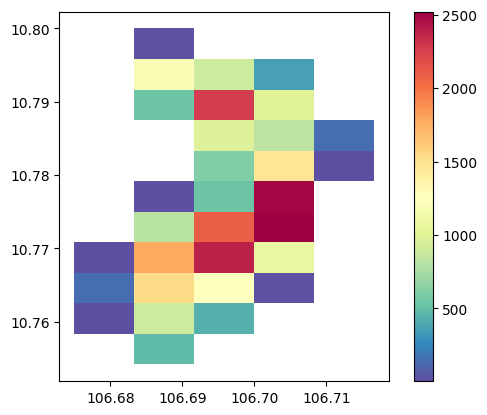

In [4]:
from vgridpandas import maidenheadpandas
import geopandas as gpd

# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
resolution = 4
stats = "count"
df_bin = df.maidenhead.maidenheadbin(resolution=resolution, stats = stats, 
                                # numeric_column="confidence",
                                # category_column="category",
                                return_geometry=True)
df_bin.plot(        
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)